In [ ]:
import io, os, math
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

rt = [1]
def fft(P):
  n = len(P)
  P = list(P)
  assert n and (n - 1) & n == 0
  
  while 2 * len(rt) < n:
    import cmath
    root = cmath.exp(2j * cmath.pi / (4 * len(rt)))
    rt.extend([r * root for r in rt])

  k = n
  while k > 1:
    for i in range(n//k):
      r = rt[i]
      for j1 in range(i*k, i*k + k//2):
        j2 = j1 + k//2
        z = r * P[j2]
        P[j2] = P[j1] - z
        P[j1] = P[j1] + z
    k //= 2
  
  rev = [0] * n
  for i in range(1, n):
    rev[i] = rev[i // 2] // 2 + (i & 1) * n // 2
  return [P[r] for r in rev]

def ifft(P):
  n = len(P)
  return fft([P[-i]/n for i in range(n)])

def fft_conv(P, Q):
  m = len(P) + len(Q) - 1
  n = 1 << m.bit_length()

  P = P + [0] * (n - len(P))
  Q = Q + [0] * (n - len(Q))
  P, Q = fft(P), fft(Q)

  return ifft([p*q for p,q in zip(P, Q)])[:m]

def sol() :
  N = int(input())
  len = 1 << math.ceil(math.log2(120000))
  X = [0] * len
  Y = [0] * len

  for i, v in enumerate(map(int, input().split())) : 
    X[i] = X[N+i] = v

  for i, v in enumerate(map(int, input().split())) : 
    Y[N-i-1] = v

  conv = fft_conv(X, Y)
  ans = 0
  for i in range(N-2, 2*N-1) : 
    ans = max(ans, round(conv[i].real))
  
  print(ans)
sol()

### 풀이
- 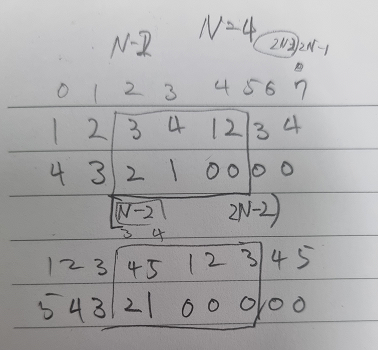
- X를 2번 반복하고, Y를 거꾸로 놓은 뒤, 이를 convolution한다.
- 이때 $[N-2, 2N-2]$ 구간에 있는 값들 중 최댓값이 정답이다.

In [ ]:
import io, os, math
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

rt = [1]
def fft(P):
  n = len(P)
  P = list(P)
  assert n and (n - 1) & n == 0
  
  while 2 * len(rt) < n:
    import cmath
    root = cmath.exp(2j * cmath.pi / (4 * len(rt)))
    rt.extend([r * root for r in rt])

  k = n
  while k > 1:
    for i in range(n//k):
      r = rt[i]
      for j1 in range(i*k, i*k + k//2):
        j2 = j1 + k//2
        z = r * P[j2]
        P[j2] = P[j1] - z
        P[j1] = P[j1] + z
    k //= 2
  
  rev = [0] * n
  for i in range(1, n):
    rev[i] = rev[i // 2] // 2 + (i & 1) * n // 2
  return [P[r] for r in rev]

def ifft(P):
  n = len(P)
  return fft([P[-i]/n for i in range(n)])

def fft_conv(P, Q):
  m = len(P) + len(Q) - 1
  n = 1 << m.bit_length()

  P = P + [0] * (n - len(P))
  Q = Q + [0] * (n - len(Q))
  P, Q = fft(P), fft(Q)

  return ifft([p*q for p,q in zip(P, Q)])[:m]

def sol() :
  N = int(input())
  len = 1 << math.ceil(math.log2(120000))
  X = [0] * len
  Y = [0] * len

  for i, v in enumerate(map(int, input().split())) : 
    X[i] = X[N+i] = v

  for i, v in enumerate(map(int, input().split())) : 
    Y[N-i-1] = v

  conv = fft_conv(X, Y)
  ans = 0
  for i in range(N-2, 2*N-1) : 
    ans = max(ans, round(conv[i].real))
  
  print(ans)
sol()